In [1]:
import pandas as pd
import rdkit
from rdkit import DataStructs, Chem
from rdkit.Chem import MACCSkeys, Draw
import torch

In [2]:
inp = pd.read_csv('./data/train.txt', names=['SMILES'])

In [3]:
inp['INCHI'] = inp['SMILES'].apply(lambda x: Chem.MolToInchiKey(Chem.MolFromSmiles(x)))
inp = inp.drop_duplicates(subset=['INCHI'], keep='first')

In [4]:
inp

,SMILES,INCHI
0,CCCCCCC1=NN2C(=N)/C(=C\c3cc(C)n(-c4ccc(C)cc4C)...,IDZWCROXWWNXQL-ZJRBDENDSA-N
1,COCC[C@@H](C)C(=O)N(C)Cc1ccc(O)cc1,YDAGYFXVVBAINK-LLVKDONJSA-N
2,C=CCn1c(S[C@H](C)c2nc3sc(C)c(C)c3c(=O)[nH]2)nn...,JJINXOJEJRZOMB-LLVKDONJSA-N
3,C[NH+](C/C=C/c1ccco1)CCC(F)(F)F,JFUZCTSYPHRVEI-DUXPYHPUSA-O
4,COc1ccc(N2C(=O)C(=O)N(CN3CCC(c4nc5ccccc5s4)CC3...,AIRMUVLCDQWVNR-UHFFFAOYSA-N
...,...,...
9995,O=C(NCc1nc2ccc(F)cc2[nH]1)[C@@H]1C[C@H]1[N+](=...,XMQHITGAOYPEJP-GMSGAONNSA-N
9996,COc1ccc(-c2[nH]cc(CO)[nH+]2)cc1,WXDITMPXBOLDKA-UHFFFAOYSA-O
9997,Cn1ncc2c1CCC[C@H]2NC(=O)CN1CCCC1=O,ZLECFBYOEAHMMM-LLVKDONJSA-N
9998,NC1=C(Br)[C@H](C(F)(F)F)N=N1,HSEQWUKHBPDMSH-UWTATZPHSA-N


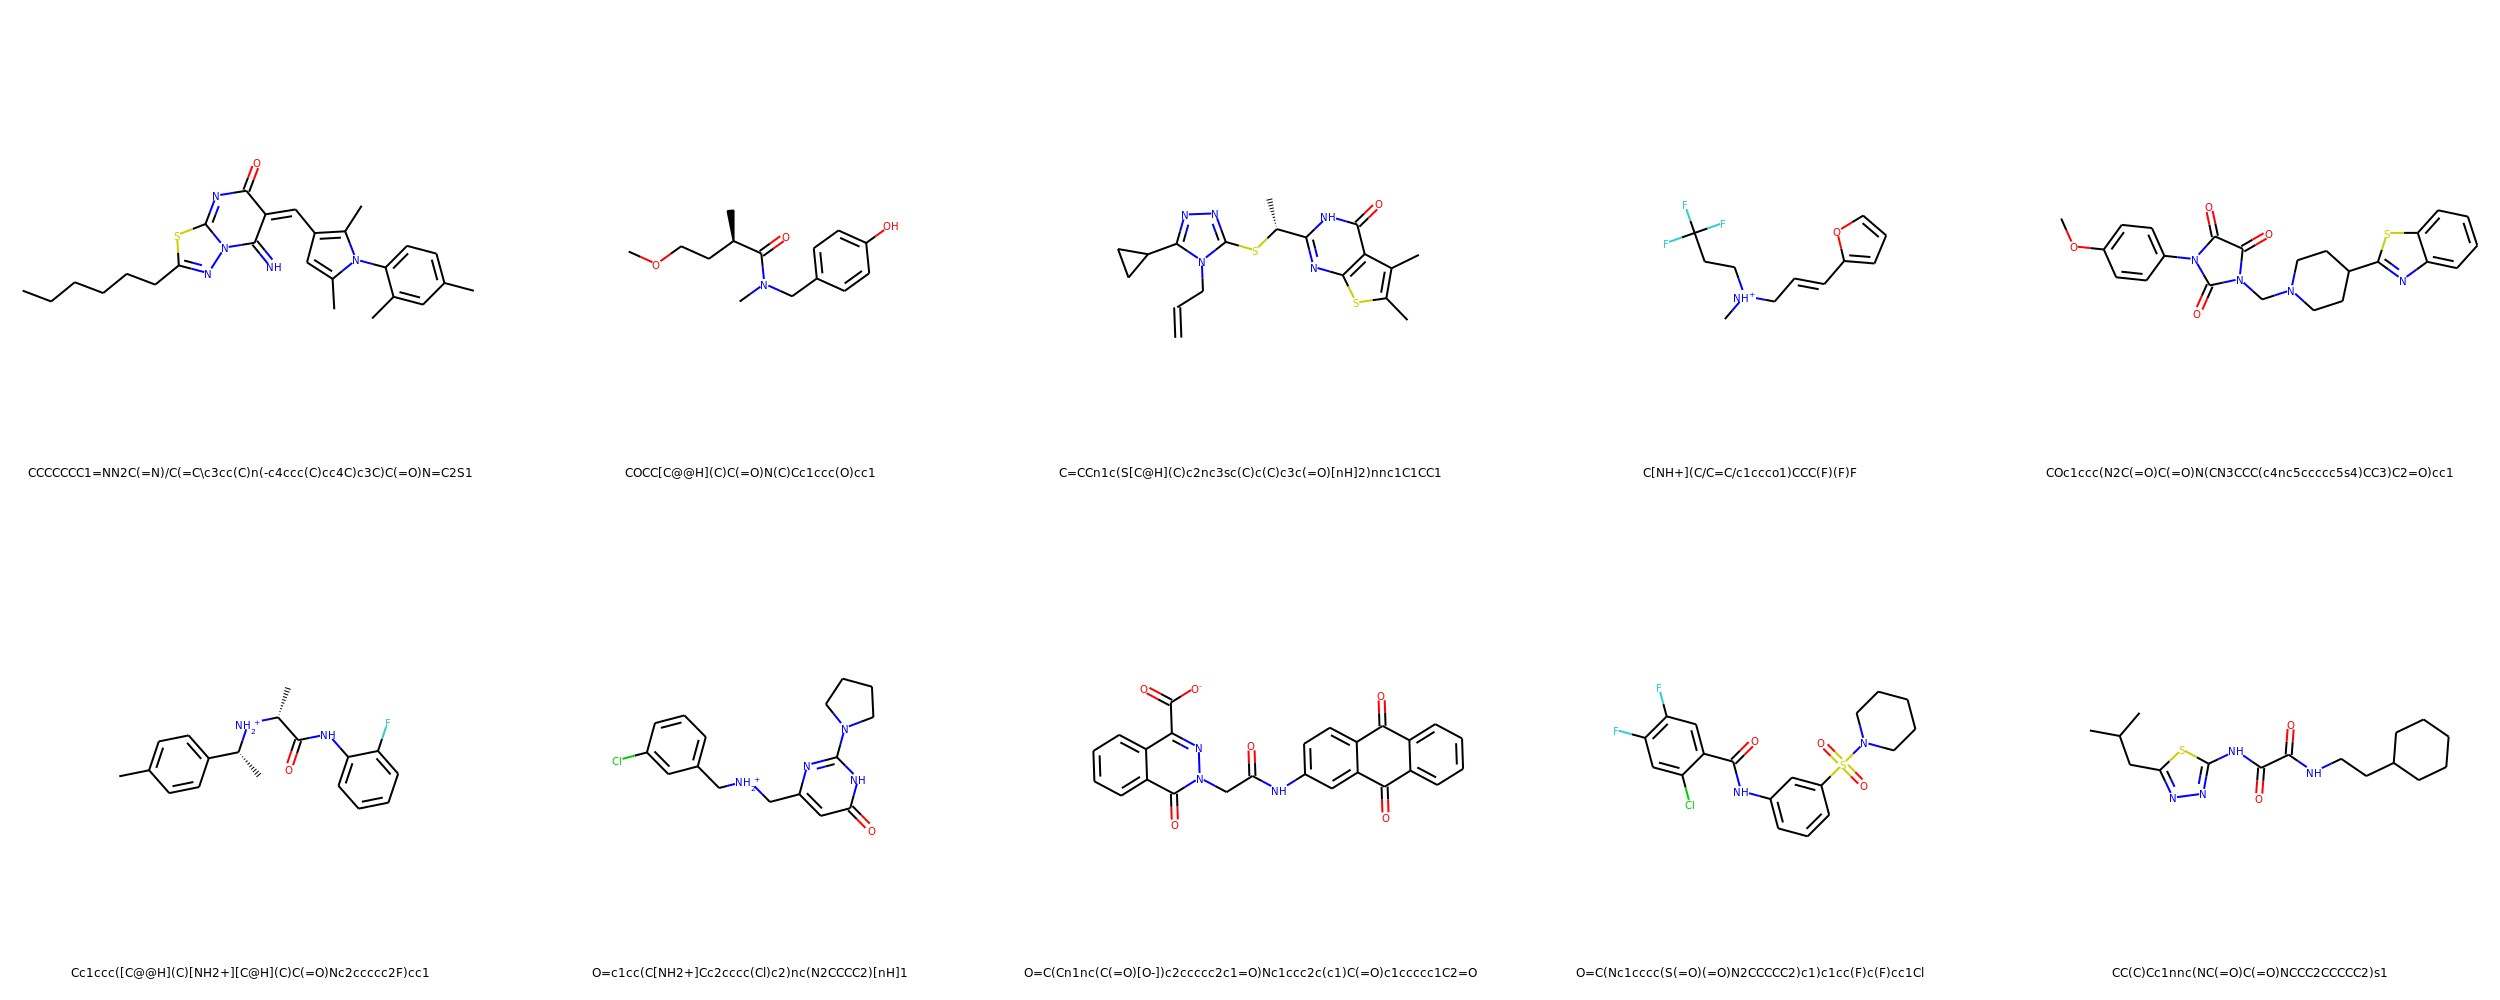

In [5]:
img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in list(inp['SMILES'])[:10]], molsPerRow=5,subImgSize=(500,500), legends=list(inp['SMILES'])[:10])
img

## Vocab Generation

In [6]:
from fast_jtnn.mol_tree import main_mol_tree
# main_mol_tree('./data/train.txt', './data/vocab.txt')

## Preprocessing
For acceleration in code execution

In [7]:
from fast_molvae.preprocess import main_preprocess
# main_preprocess('./data/train.txt', './fast_molvae/processed/', num_splits=100)

## Training VAE

In [8]:
from fast_molvae.vae_train import main_vae_train
# model = main_vae_train('./fast_molvae/processed/', './data/vocab.txt', './fast_molvae/vae_model/')

## Sampling

In [9]:
from fast_molvae.sample import main_sample
# main_sample('./data/vocab.txt', './fast_molvae/vae_model/sample.txt', 'fast_molvae/vae_model/model.epoch-19', 100)

In [10]:
out = pd.read_csv('./fast_molvae/vae_model/sample.txt', names=['SMILES'])

In [11]:
out['INCHI'] = out['SMILES'].apply(lambda x: Chem.MolToInchiKey(Chem.MolFromSmiles(x)))
out = out.drop_duplicates(subset=['INCHI'], keep='first')

In [12]:
out

,SMILES,INCHI
0,CON1C=C(C(=O)Nc2cccc([N+](=O)[O-])c2)C=CC1,PYRRKQWYTZKZCF-UHFFFAOYSA-N
1,Cc1conc1NC(=O)c1cccc2c1OCCO2,LFBFGCUIVTXBEN-UHFFFAOYSA-N
2,CON1C=CC=CC1C(=O)Nc1ccc([N+](=O)[O-])cc1,OHNAVNNGIQDZNJ-UHFFFAOYSA-N
3,Cc1cc(NC(=O)c2ccc3c(c2)OCCO3)no1,PXIDZNHQAZVPHE-UHFFFAOYSA-N
4,CN1COC(=O)C1c1cccc2c1OCCO2,RKNATXIGCSRFSX-UHFFFAOYSA-N
...,...,...
94,O=C(CS(=O)(=O)NC1CCCC[NH2+]1)Nc1cccc2c1OC=CO2,CCYUAYXURYWPGJ-UHFFFAOYSA-O
95,CC1C(NCc2cccc3c2COC3)CCCS1(=O)=O,XCNHSCUIDMIXJH-UHFFFAOYSA-N
96,Cc1cnoc1NS(=O)(=O)Cc1ccccc1,SYDDZUDETRAKEM-UHFFFAOYSA-N
97,Cc1n[nH]cc1C[NH2+]c1ccc(C(N)=O)c2ccccc12,LJQSVMGNUQLDLR-UHFFFAOYSA-O


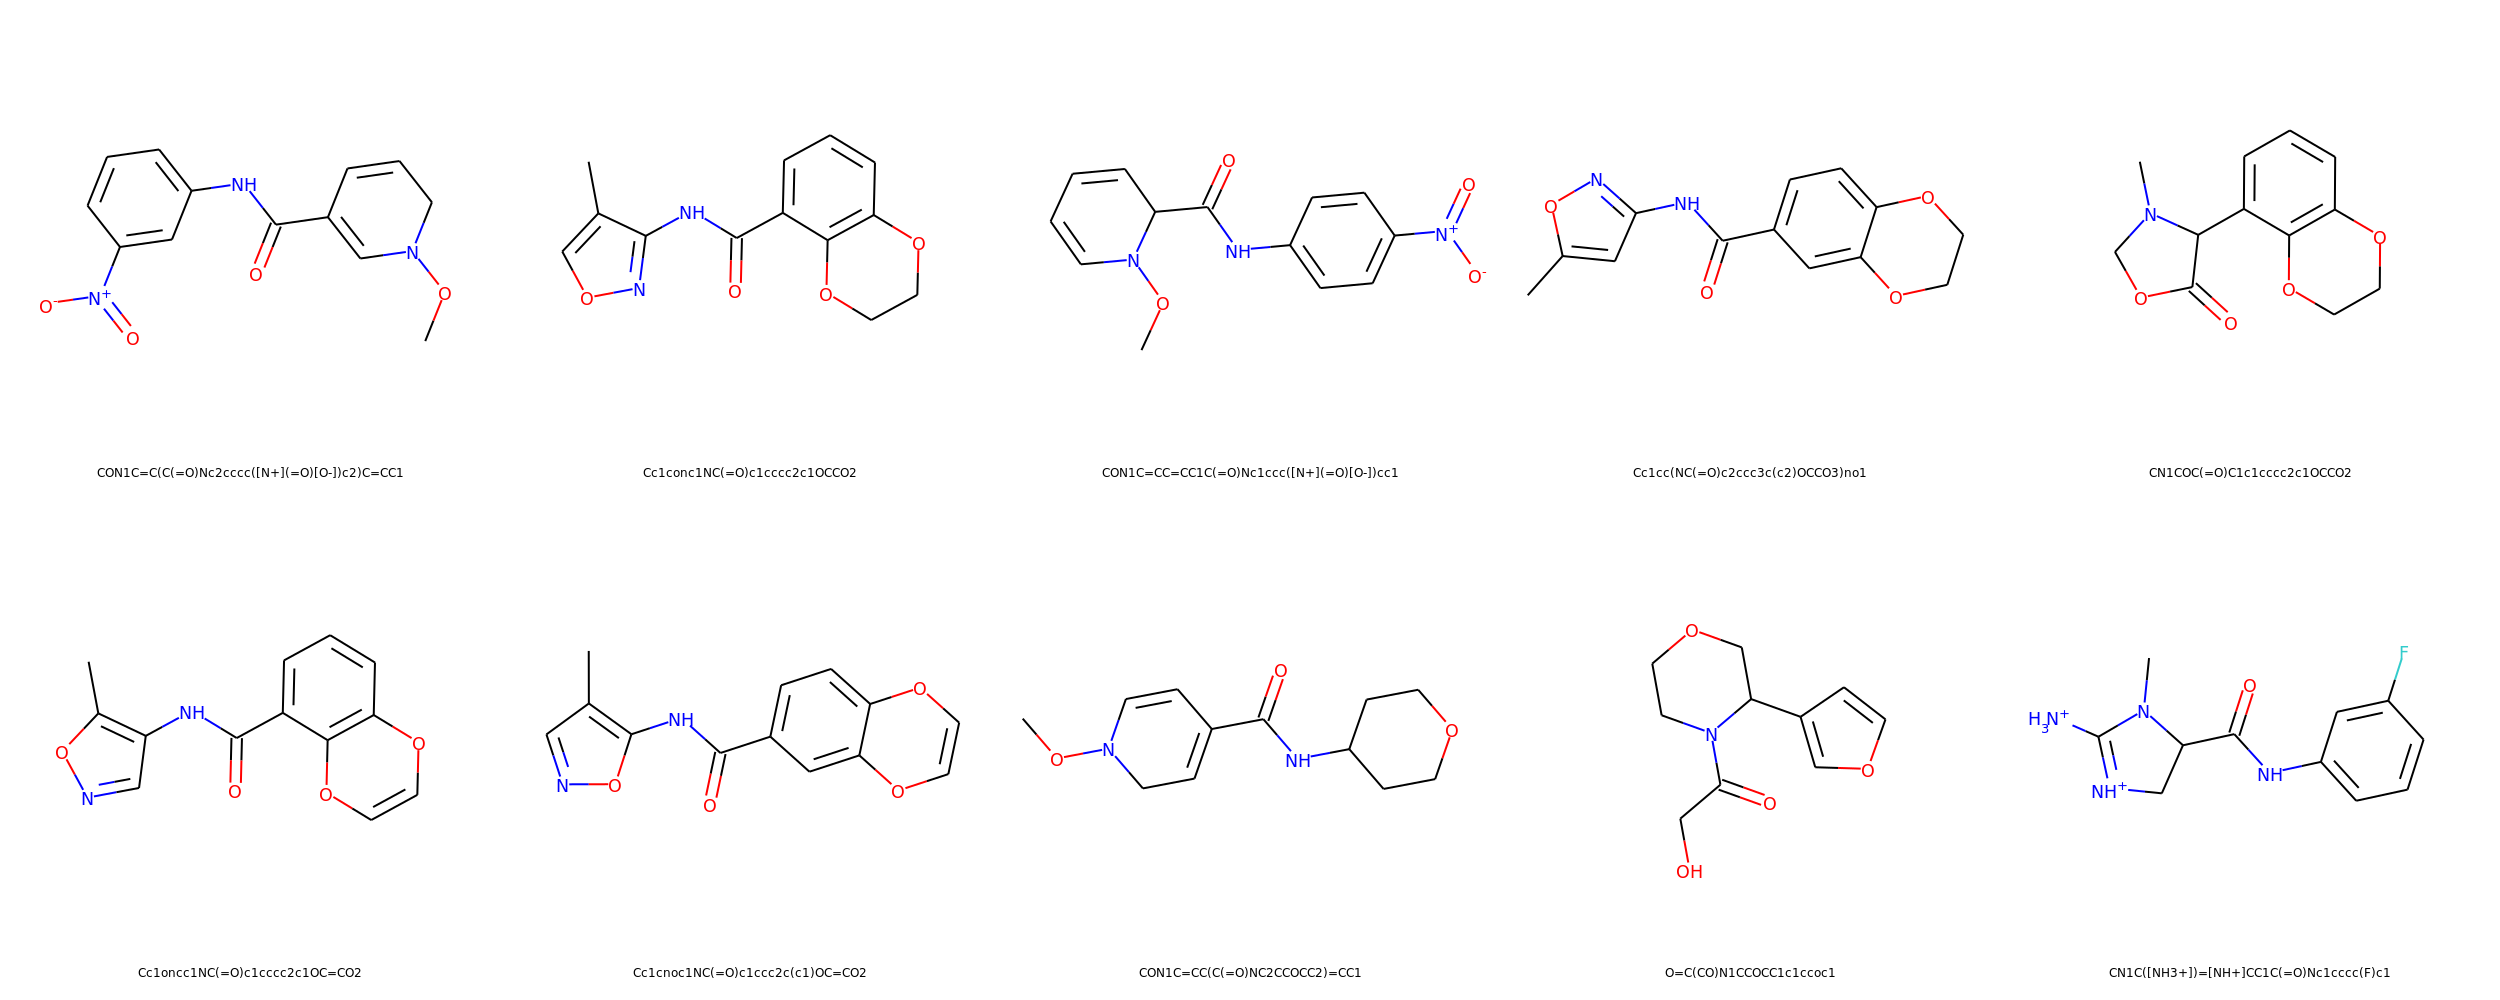

In [13]:
img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in list(out['SMILES'])[:10]], molsPerRow=5,subImgSize=(500,500), legends=list(out['SMILES'])[:10])
img

## Latent space

In [14]:
from fast_molvae.sample import load_model
model = load_model('./data/vocab.txt', './fast_molvae/vae_model/model.epoch-19')

/home/bibyutatsu/anaconda3/envs/Rdkit_env/lib/python3.7/site-packages/torch-1.0.1-py3.7-linux-x86_64.egg/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [15]:
z = torch.randn(1, 56//2).cuda() # a random tensor of size (1, latent_size / 2)

In [16]:
print('Random Smile: ', model.decode(z, z, False))

Random Smile:  CON1C=C(C(=O)Nc2cccc([N+](=O)[O-])c2)C=CC1


/home/bibyutatsu/anaconda3/envs/Rdkit_env/lib/python3.7/site-packages/torch-1.0.1-py3.7-linux-x86_64.egg/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/bibyutatsu/anaconda3/envs/Rdkit_env/lib/python3.7/site-packages/torch-1.0.1-py3.7-linux-x86_64.egg/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [17]:
import matplotlib.pyplot as plt

In [18]:
x = [i for _ in range(7) for i in range(-3, 4)]
y = [i for i in range(-3, 4) for _ in range(7)]
label_float = [(z[0][0].item()*(1 + xs*2), z[0][1].item()*(1 + ys*2)) for xs, ys in zip(reversed(x), reversed(y))]
# label = ['%.3f'%(xs)+','+ '%.3f'%(ys) for xs, ys in label_float]#zip(reversed(x), reversed(y))]
z_labels = [z.detach().clone() for _ in range(len(x))]

# Minor changes in the Tensor z to sample new molecules
for i, (xs, ys) in enumerate(label_float):
    z_labels[i][0][0] = xs
    z_labels[i][0][1] = ys

/home/bibyutatsu/anaconda3/envs/Rdkit_env/lib/python3.7/site-packages/torch-1.0.1-py3.7-linux-x86_64.egg/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/bibyutatsu/anaconda3/envs/Rdkit_env/lib/python3.7/site-packages/torch-1.0.1-py3.7-linux-x86_64.egg/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


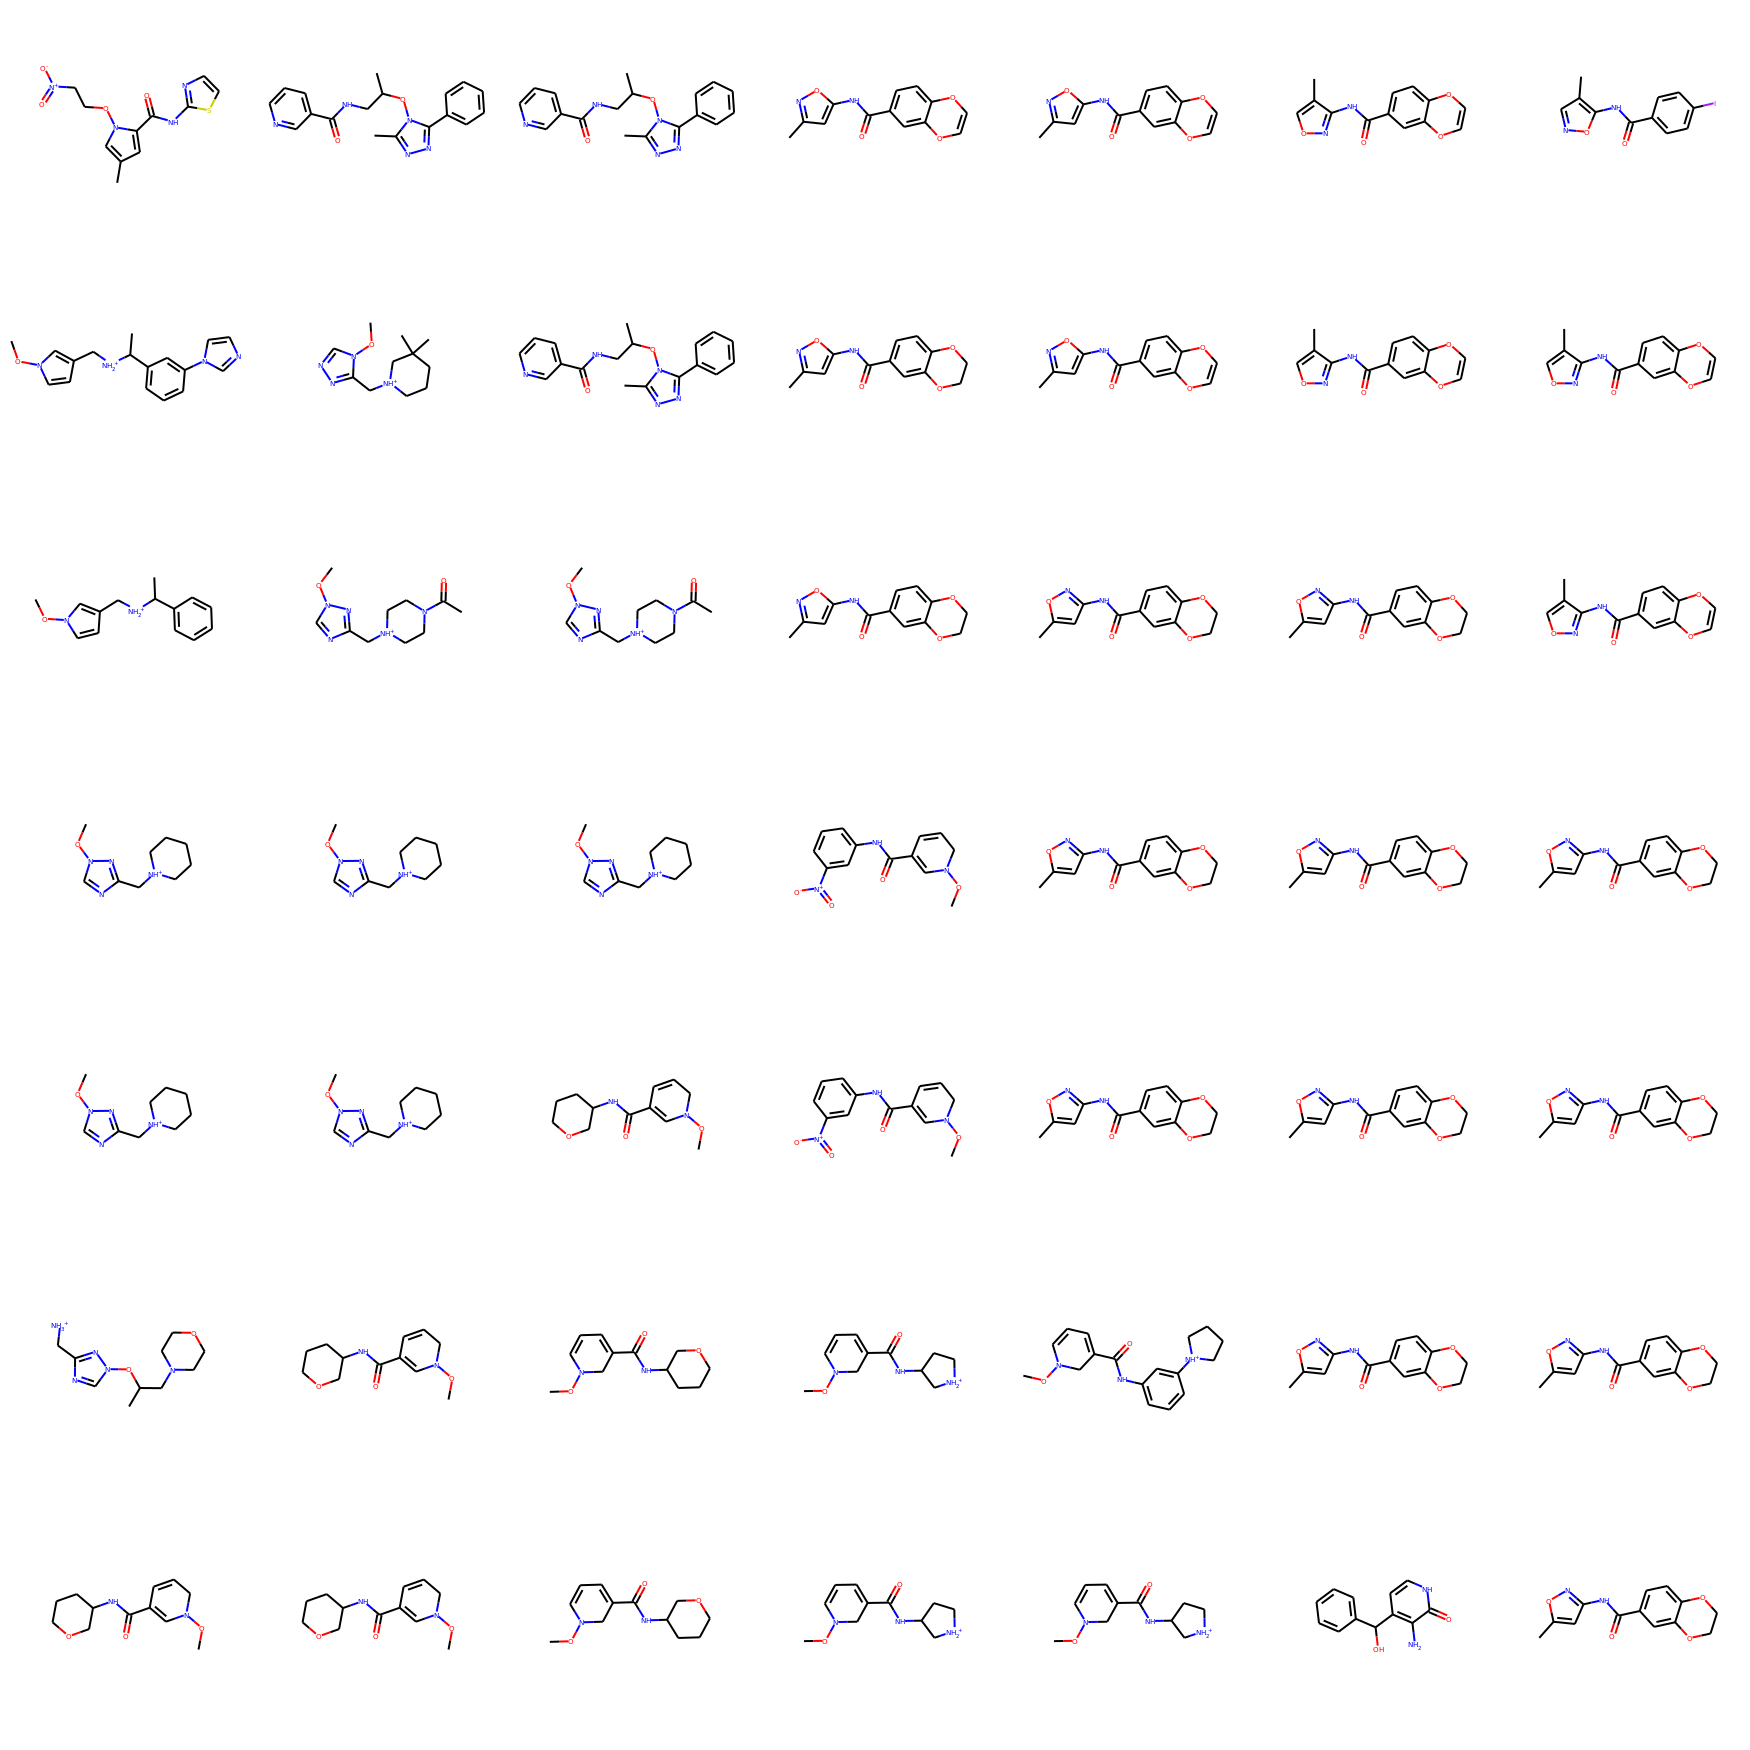

In [19]:
smiles = []
for zs in z_labels:
    smiles.append(model.decode(zs, zs, False))
img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in smiles], molsPerRow=7,subImgSize=(250,250))
img

## Bayesian Optimization
For scoring we used a summation of three properties of molecules: SA ; logP ; cycle length

### Score and Latent feature generation step

In [20]:
from fast_bo.gen_latent import main_gen_latent
# main_gen_latent('./data/train.txt', './data/vocab.txt', './fast_molvae/vae_model/model.epoch-19', output_path='./fast_bo/descriptors/',)

In [21]:
from fast_bo.run_bo import main_bo
# main_bo('./data/vocab.txt', './fast_molvae/vae_model/model.epoch-19', './fast_bo/results', './fast_bo/descriptors/', iterations=2, sampling=60, random_seed=1)

In [24]:
target_input = pd.read_csv('./fast_bo/descriptors/targets.txt', names=['Target'])

In [25]:
target_input['Target'].describe().astype(int)

count    10000
mean         0
std          2
min        -23
25%         -1
50%          0
75%          1
max          4
Name: Target, dtype: int64

In [26]:
from fast_bo.gen_latent import scorer

In [27]:
_, _, _, target_sample = scorer(list(out['SMILES']))
target_output = pd.DataFrame(target_sample, columns=['Target'])

In [28]:
target_output['Target'].describe().astype(int)

count    89
mean      0
std       1
min      -6
25%       0
50%       0
75%       1
max       2
Name: Target, dtype: int64

In [29]:
from fast_bo.run_bo import load_object

In [30]:
bo_scores = load_object('fast_bo/results/scores0.pkl') + load_object('fast_bo/results/scores1.pkl')
bo_smiles = load_object('fast_bo/results/valid_smiles0.pkl') + load_object('fast_bo/results/valid_smiles1.pkl')
target_optimized = pd.DataFrame({'Target': bo_scores, 'SMILES':bo_smiles})
print(target_optimized.shape)

(100, 2)


In [31]:
target_optimized['INCHI'] = target_optimized['SMILES'].apply(lambda x: Chem.MolToInchiKey(Chem.MolFromSmiles(x)))
target_optimized = target_optimized.drop_duplicates(subset=['INCHI'], keep='first')
print(target_optimized.shape)

(99, 3)


In [32]:
target_optimized['Target'].describe().astype(int)

count    99
mean      0
std       1
min      -2
25%      -1
50%       0
75%       0
max      10
Name: Target, dtype: int64